# Loan Prediction
This notebook is a documentation of the process of predicting the loan taken up for the bank customers. It includes the data transformation and data exploration process.
<br/>

The prediction model can be found in the loan prediction modelling file.
<br>
### Table of Content
1. Import Libraries and Datasets
2. Features Selection
3. One Hot Encoding on Categorical Features
4. Model Building 
5. Predictions and Evaluations 
6. Further improvements

## 1. Import Libraries and Datasets

In [385]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandasql as ps
from datetime import date

# Data exploration
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [386]:
final = pd.read_csv("final.csv")

## 2. Features Selection
There are many features in the final file after performing data wrangling and transformation. Some of which are not required to be inputs in our prediction model. To ensure that we only have the features that we need, we will have to identify them and remove the unnecessary features.

In [387]:
order = ['district_id','gender','age','bank_balance_at_loan2','avg_trans_amt','no_trans','average_salary','no_of_inhabitants',
        'unemployment_rate','no_of_entrepreneurs','no_of_crime','loan_taken']
pred_model = final[order]

The feature 'unemployment rate' has '?' values and is in str type. This will cause an error when building a prediction model. There is no unemployment rate available for district '69' and we will replace the '?' values with the average unemployment rate in Czech. We will also convert the data type from str to float.

In [388]:
pred_model['unemployment_rate']= pred_model['unemployment_rate'].replace('?',np.nan)

In [389]:
pred_model['unemployment_rate'] = pred_model['unemployment_rate'].apply(float)

In [390]:
unemployment_mean = pred_model['unemployment_rate'].mean()

In [391]:
pred_model.isnull().values.any()

True

In [392]:
pred_model['unemployment_rate'] = pred_model['unemployment_rate'].fillna(unemployment_mean)

## 3. One Hot Encoding on Categorical Features
In order to fit the categorical features into our logistic regression model, we will have to apply one-hot encoding on the categorical variables (district and gender).

To perform one-hot encoding, we'll be importing the necessary libraries from skicit learn package. We'll then encode the district and gender columns and join the encoded data onto the original dataset. Following that, we'll rename the columns for the encoded data and drop the original district and gender columns to prevent repetition of data.

In [393]:
from sklearn.preprocessing import OneHotEncoder

In [394]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(pred_model[['gender']]).toarray())
final_pred_model = pred_model.join(encoder_df)
final_pred_model = final_pred_model.rename(columns = {0: 'female', 1 :'male'})
final_pred_model.drop('gender',axis=1, inplace=True)

In [395]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(final_pred_model[['district_id']]).toarray())
final_pred_model = final_pred_model.join(encoder_df)
final_pred_model = final_pred_model.rename(columns = {
    0:'prague', 1:'benesov', 2:'beroun', 3:'kladno', 4:'kolin', 5:'kutna_hora', 6:'melnik', 7:'mlada_boleslav', 8:'nymburk',
    9:'praha_vychod', 10:'praha_zapad', 11:'pribram', 12:'rakovnik', 13:'ceske_budejovice', 14:'cesky_krumlov', 
    15:'jindrichuv_hradec',16:'pelhrimov', 17:'pisek', 18:'prachatice', 19:'strakonice', 20:'tabor', 21:'domazlice', 
    22:'cheb', 23:'karlovy_vary', 24:'klatovy', 25:'plzen_mesto', 26:'plzen_jih', 27:'plzen_sever', 28:'rokycany', 
    29:'sokolov', 30:'tachov', 31:'ceska_lipa', 32:'decin', 33:'chomutov', 34:'jablonec_nisou', 35:'liberec', 36:'litomerice',
    37:'louny', 38:'most', 39:'teplice', 40:'usti_nad_labem', 41:'havlikuv_brov', 42:'hradec_kralove', 43:'chrudim',
    44:'jicin', 45:'nachod', 46:'pardubice', 47:'rychnov_nad_kneznou', 48:'semily', 49:'svitavy', 50:'trutnov', 
    51:'usti_nad_orlici', 52:'blansko', 53:'brno_mesto', 54:'brno_venkov', 55:'breclav', 56:'hodonin', 57:'jihlava',
    58:'kromeriz', 59:'prostejov', 60:'trebic', 61:'uherske_hradiste', 62:'vsykov', 63:'zlin', 64:'znojmo',
    65:'zdar_nad_sazavou', 66:'bruntal', 67:'frydek_mistek', 68:'jesenik', 69:'karvina', 70:'novy_jicin', 71:'olomouc',
    72:'opava', 73:'ostrava_mesto', 74:'prerov', 75:'sumperk', 76:'vsetin'
})
final_pred_model.drop('district_id',axis=1, inplace=True)

## 4. Model Building

We will import the sklearn library and split our data into training set & testing set. We'll first ensure that we have a satisfactory performance metrics from our training set before inputing the testing set into our logistic regression model.

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
X = final_pred_model[final_pred_model.columns.difference(['loan_taken'])]
y = final_pred_model['loan_taken']

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [399]:
from sklearn.linear_model import LogisticRegression

In [400]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## 5. Predictions and Evaluations

## 5.1 Model 1 - Logistic Regression Model
For model 1, we will be including all the available features from the dataset provided. The aim is to identify the important features and remove the features that have no correlation with the target variable.

In [401]:
predictions = logmodel.predict(X_train)

In [402]:
from sklearn.metrics import classification_report

In [403]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2567
           1       0.70      0.48      0.57       448

    accuracy                           0.89      3015
   macro avg       0.81      0.72      0.76      3015
weighted avg       0.88      0.89      0.88      3015



The model has an accuracy of 89% which shows the effectiveness of the model in predicting loan taken up for existing customers. 
</br>

Next we'll look at the model statistics to determine if there should be any features that we should drop to improve the model.

In [404]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.225359
         Iterations: 35
                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.464      
Dependent Variable:         loan_taken             AIC:                    1522.9162  
Date:                       2022-04-05 21:10       BIC:                    2015.8473  
No. Observations:           3015                   Log-Likelihood:         -679.46    
Df Model:                   81                     LL-Null:                -1267.1    
Df Residuals:               2933                   LLR p-value:            1.2661e-193
Converged:                  0.0000                 Scale:                  1.0000     
No. Iterations:             35.0000                                                   
--------------------------------------------------------------------------------------
                       Coef.     Std.Err.      z     P>|z|      [0.025       0.975]   
-------------

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The stats model shows a lot of nan p values particularly for districts. It seems that the optimization has converged. The optimization picks one solution out of the optimal set (Prague out of all the districts), and the remaining districts have converged. 
</br>

There are also a lot of features with p-values greater than 0.05 which indicates that we should accept the null hypothesis. The null hypothesis being there is no linear relationship between the variable and the Y-factor. Hence, we need to drop these features in the next model.

## 4.2 Model 2 - Feature reduction
For the second model, we will remove the features that have converged. We will also reassess the p-values for the remaining features and perform a feature importance ranking to assess the drivers behind our logistic regression model.

In [405]:
X = final_pred_model[['bank_balance_at_loan2','avg_trans_amt','no_trans','average_salary','no_of_inhabitants',
        'unemployment_rate','no_of_entrepreneurs','no_of_crime','male','female','prague']]
y = final_pred_model['loan_taken']

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [407]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [408]:
predictions = logmodel.predict(X_train)

In [409]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2567
           1       0.70      0.48      0.57       448

    accuracy                           0.89      3015
   macro avg       0.81      0.72      0.76      3015
weighted avg       0.88      0.89      0.88      3015



Model 2 has a high accuracy at 89% but has an issue in correctly identifying loan customers. Out of all the loan customers, the model has only correctly predicted 48% of them.

In [410]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.237738
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.434      
Dependent Variable:   loan_taken        AIC:               1455.5619  
Date:                 2022-04-05 21:10  BIC:               1521.6868  
No. Observations:     3015              Log-Likelihood:    -716.78    
Df Model:             10                LL-Null:           -1267.1    
Df Residuals:         3004              LLR p-value:       3.9521e-230
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
bank_balance_at_loan2 -0.0000   0.0000  -4.2781 0.0000 -0.0000 -0.0000
avg

In [411]:
importance = logmodel.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00001
Feature: 1, Score: 0.00027
Feature: 2, Score: -0.02351
Feature: 3, Score: -0.00004
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00002
Feature: 6, Score: -0.00009
Feature: 7, Score: -0.00004
Feature: 8, Score: -0.00001
Feature: 9, Score: 0.00001
Feature: 10, Score: -0.00000


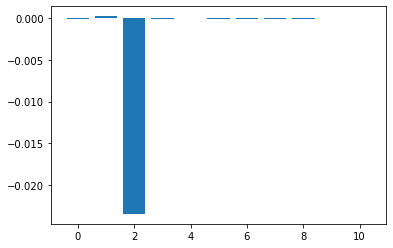

In [412]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

From the model statistics, there are still a few features that needs to be dropped as they do not aid in the prediction of loan taken up. These features have a p-value of greater than 0.05
</br>

When we plot the features importance on a chart, we can see that feature 3 is the most important feature to predict loan taken up. The feature is the number of transactions made. If we were to think logically, there should be no relationship between number of transactions made and loan taken. We can perform a univariate analysis on this feature to assess further.

In [413]:
final_pred_model.groupby(['loan_taken','no_trans'], as_index=False).mean().groupby('loan_taken')['no_trans'].mean()

loan_taken
0    283.613084
1     92.887574
Name: no_trans, dtype: float64

The number of transactions made by our non-loan customers are significantly higher than our loan customers. The derivation of number of transactions for non-loan customers is using the number of transactions made during the lifetime of the customers. The derivation of number of transactions for loan customers on the other hand is using the number of transactions made as at the loan date.
</br>

The number of transactions made during a lifetime of a customer will definitely be higher resulting in the non-loan customers having a much higher number of transactions made. This resulted in the logistic regression model predicting that the lower the number of transactions made, the higher the probability of a customer taking up a loan with us.
</br>

This feature is not representative of a true relationship and cannot be used to predict future loan customers. Hence this feature should be dropped.

## Model 3 - Further Feature Reduction
On top of removing the number of transactions feature, we will also remove the features with p-values greater than 0.05. This leaves us with 3 features (bank balance, average transaction and average salary).

**Analyzing results of train set**

In [414]:
X = final_pred_model[['bank_balance_at_loan2','avg_trans_amt','average_salary']]
y = final_pred_model['loan_taken']

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [416]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [417]:
predictions = logmodel.predict(X_train)

In [418]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2567
           1       0.46      0.16      0.24       448

    accuracy                           0.85      3015
   macro avg       0.67      0.56      0.58      3015
weighted avg       0.81      0.85      0.81      3015



The classification report shows that the train model has a high accuracy at 85%. However, the model weakness is in the recall at 15%. This is due to the imbalance of target classes with loan customers accounting for about 15% of the total customers.
</br>

Among all the loan customers, the model is only accurately identifying 16% of them. As our model's function is to predict loan taken, this a significant weakness and the model has to be fine-tuned further.

In [419]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.357086
         Iterations 6
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.150     
Dependent Variable:    loan_taken        AIC:               2159.2256 
Date:                  2022-04-05 21:10  BIC:               2177.2597 
No. Observations:      3015              Log-Likelihood:    -1076.6   
Df Model:              2                 LL-Null:           -1267.1   
Df Residuals:          3012              LLR p-value:       1.9253e-83
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
bank_balance_at_loan2 -0.0000   0.0000  -9.8683 0.0000 -0.0000 -0.0000
avg

From the model statstics, all the features have a p-value of less than 0.05. This shows that all the features have a linear relationship with loan taken up.

In [420]:
importance = logmodel.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00002
Feature: 1, Score: 0.00025
Feature: 2, Score: -0.00026


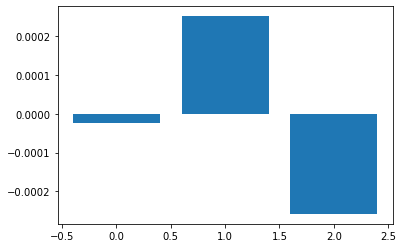

In [421]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The feature ranking is as follows:
1. Average Salary
2. Average Transaction Amount
3. Bank Balance at Loan

**Analyzing results of test set**

In [422]:
logmodel = LogisticRegression()
logmodel.fit(X_test,y_test)

LogisticRegression()

In [423]:
predictions = logmodel.predict(X_test)

**a. Classification report**

In [424]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1251
           1       0.44      0.17      0.24       234

    accuracy                           0.84      1485
   macro avg       0.65      0.56      0.58      1485
weighted avg       0.79      0.84      0.80      1485



The classification report shows that the test model has a high accuracy at 84%. However, the model weakness is in the recall at 17%. This is due to the imbalance of target classes with loan customers accounting for about 15% of the total customers.
</br>

Among all the loan customers, the model is only accurately identifying 17% of them. As our model's function is to predict loan taken. This a significant weakness and the model has to be fine tuned further.

**b. Model statistics**

In [425]:
import statsmodels.api as sm
logit_model=sm.Logit(y_test,X_test)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.358949
         Iterations 6
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.176     
Dependent Variable:    loan_taken        AIC:               1072.0793 
Date:                  2022-04-05 21:10  BIC:               1087.9888 
No. Observations:      1485              Log-Likelihood:    -533.04   
Df Model:              2                 LL-Null:           -646.91   
Df Residuals:          1482              LLR p-value:       3.5302e-50
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
bank_balance_at_loan2 -0.0000   0.0000  -7.5341 0.0000 -0.0000 -0.0000
avg

From the model statstics, all the features have a p-value of less than 0.05. This shows that they have a linear relationship with loan taken up.

**c. Calibration curve**

In [426]:
from sklearn.svm import SVC
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

In [427]:
model = SVC(probability=True)
model.fit(X_test, y_test)

SVC(probability=True)

In [428]:
prob = model.decision_function(X_test)

In [429]:
x, y = calibration_curve(y_test, prob, n_bins = 10, normalize = True)

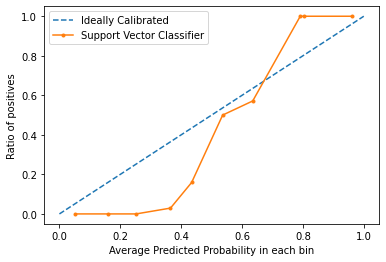

In [430]:
# Plot calibration curve
 
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Support Vector Classifier')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

Calibration denotes the consistency between predicted probabilities and their actual frequencies observed on a test dataset. The better calibrated or more reliable a forecast, the closer the points will appear along the main diagonal from the bottom left to the top right of the plot. 
</br>

As seen on the chart, our model is mainly on the bottom right of the chart which indicates that the model has over-forecasted; the probabilities are too large. In other words, the model has over forecasted the loan taken up.

**d. ROC curve**

In [431]:
import sklearn.metrics as metrics

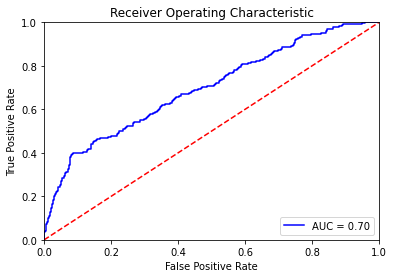

In [432]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The Receiver Operating Characteristic (or ROC) curve shows the true positive rate vs. the false positive resulting from different cutoffs in the predictive model. The "faster" the curve climbs, the better it is. On the contrary, a curve close to the diagonal line is worse. On our chart, the ROC curve has a gentle slope skewing to the top left of the chart. Therefore, there is still room for improvements on  the model.
</br>

The AUC (Area Under the Curve) for this model is 0.70 and represents acceptable discrimination.
</br>

ROC curves should be used when there are roughly equal numbers of observations for each class. (loan customers make up only 15% of our total customers). ROC curve with an imbalanced dataset might be deceptive and lead to incorrect interpretations of the model skill. The confusion matrix will be more useful to explain the performance of the model.

## 5. Further Improvements
Further enhancements can be made to improve the accuracy of the model. We can perform the following improvements:
1. Average standard rescaling on the numeric features 
2. Split the dataset by using 'class rebalance'
3. Weighting Strategy by assigning class weights